C:\Users\akichika\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 26481 (\N{CJK UNIFIED IDEOGRAPH-6771}) missing from current font.
  fig.canvas.draw()
C:\Users\akichika\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from current font.
  fig.canvas.draw()
C:\Users\akichika\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 21517 (\N{CJK UNIFIED IDEOGRAPH-540D}) missing from current font.
  fig.canvas.draw()
C:\Users\akichika\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 21476 (\N{CJK UNIFIED IDEOGRAPH-53E4}) missing from current font.
  fig.canvas.draw()
C:\Users\akichika\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 23627 (\N{CJK UNIFIED IDEOGRAPH-5C4B}) mi

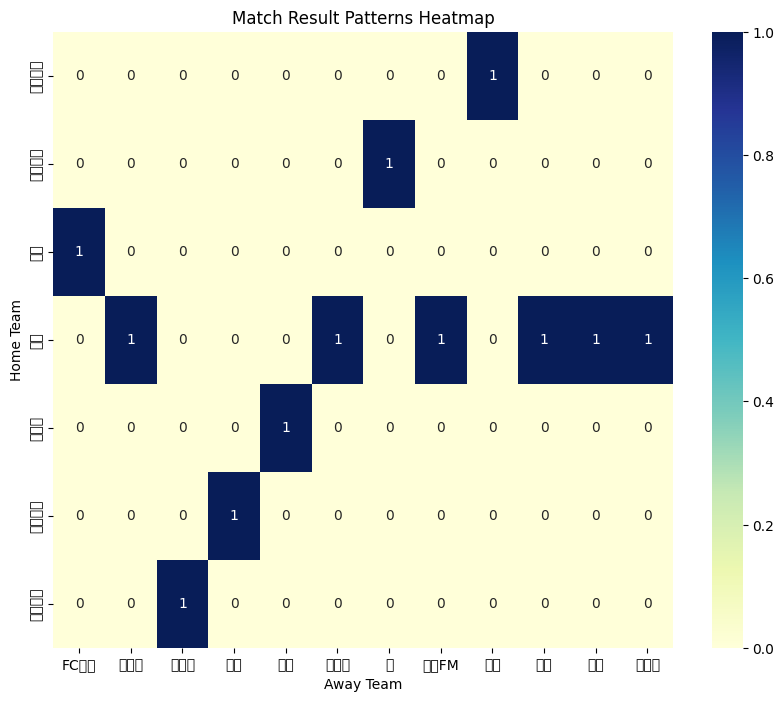

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSVファイルを読み込む
data = pd.read_csv('./J1_dataset/J_League_Uraw_Matches_2024.csv')

# データを12行目までに制限
data = data.head(12)

# スコアをカテゴリに分ける関数
def categorize_score(score):
    if pd.isna(score):
        return 'Score Missing'
    try:
        home_goals, away_goals = map(int, score.split('-'))
    except ValueError:
        return 'Invalid Score Format'

    if home_goals > away_goals:
        if (home_goals, away_goals) in [(1, 0), (2, 0), (2, 1), (3, 0), (3, 1), (3, 2)]:
            return f'Home Win {home_goals}-{away_goals}'
        else:
            return 'Home Win Other'
    elif home_goals < away_goals:
        if (away_goals, home_goals) in [(1, 0), (2, 0), (1, 2), (3, 0), (1, 3), (2, 3)]:
            return f'Away Win {away_goals}-{home_goals}'
        else:
            return 'Away Win Other'
    else:
        if (home_goals, away_goals) in [(0, 0), (1, 1), (2, 2)]:
            return f'Draw {home_goals}-{away_goals}'
        else:
            return 'Draw Other'

data['Result Category'] = data['スコア'].apply(categorize_score)

# ヒートマップ用のデータを作成（Home Team vs Away Team）
result_matrix = pd.pivot_table(data, values='Result Category', index='会場', columns='相手', aggfunc='count', fill_value=0)

# ヒートマップを描画
plt.figure(figsize=(10, 8))
sns.heatmap(result_matrix, annot=True, cmap="YlGnBu")
plt.title('Match Result Patterns Heatmap')
plt.xlabel('Away Team')
plt.ylabel('Home Team')
plt.show()


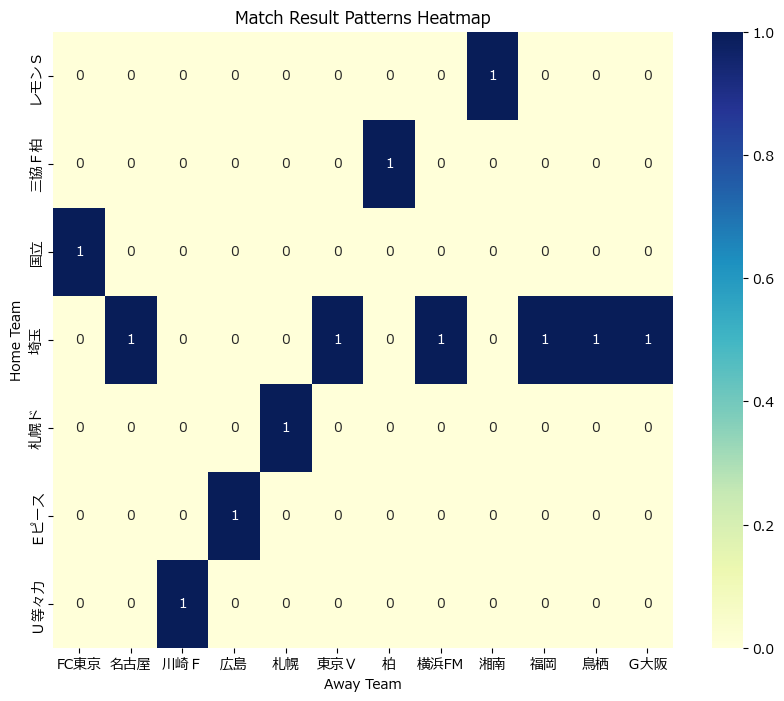

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('./J1_dataset/J_League_Uraw_Matches_2024.csv')

# Limit the data to the first 12 rows
data = data.head(12)

# Function to categorize the score
def categorize_score(score):
    if pd.isna(score):
        return 'Score Missing'
    try:
        home_goals, away_goals = map(int, score.split('-'))
    except ValueError:
        return 'Invalid Score Format'

    if home_goals > away_goals:
        if (home_goals, away_goals) in [(1, 0), (2, 0), (2, 1), (3, 0), (3, 1), (3, 2)]:
            return f'Home Win {home_goals}-{away_goals}'
        else:
            return 'Home Win Other'
    elif home_goals < away_goals:
        if (away_goals, home_goals) in [(1, 0), (2, 0), (1, 2), (3, 0), (1, 3), (2, 3)]:
            return f'Away Win {away_goals}-{home_goals}'
        else:
            return 'Away Win Other'
    else:
        if (home_goals, away_goals) in [(0, 0), (1, 1), (2, 2)]:
            return f'Draw {home_goals}-{away_goals}'
        else:
            return 'Draw Other'

data['Result Category'] = data['スコア'].apply(categorize_score)

# Create data for the heatmap (Home Team vs Away Team)
result_matrix = pd.pivot_table(data, values='Result Category', index='会場', columns='相手', aggfunc='count', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(result_matrix, annot=True, cmap="YlGnBu")
plt.title('Match Result Patterns Heatmap')
plt.xlabel('Away Team')
plt.ylabel('Home Team')
plt.show()
